# Travelling Salesman Problem using Genetic Algorithm

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
NUM_CITIES = 15
NUM_CHROMOSOMES = 15
NUM_ITERATIONS = 20
ELITISM = 1
MUTATION_RATE = 0.1

# Generate random symmetric distance matrix
np.random.seed(42)
distance_matrix = np.random.randint(10, 100, size=(NUM_CITIES, NUM_CITIES))
np.fill_diagonal(distance_matrix, 0)
distance_matrix = (distance_matrix + distance_matrix.T) // 2

# Print the distance matrix
print("Symmetric Distance Matrix:")
print(distance_matrix)

Symmetric Distance Matrix:
[[ 0 60 75 59 43 72 79 50 52 53 32 39 21 66 19]
 [60  0 68 19 58 56 31 69 64 40 27 56 68 67 31]
 [75 68  0 42 79 69 53 66 53 86 32 48 48 45 72]
 [59 19 42  0 79 47 58 59 59 17 65 53 58 37 35]
 [43 58 79 79  0 41 41 50 23 49 29 58 45 37 99]
 [72 56 69 47 41  0 37 49 79 57 46 71 82 50 66]
 [79 31 53 58 41 37  0 34 75 81 69 59 32 54 44]
 [50 69 66 59 50 49 34  0 44 19 65 54 38 73 61]
 [52 64 53 59 23 79 75 44  0 97 56 79 54 88 44]
 [53 40 86 17 49 57 81 19 97  0 90 79 52 64 38]
 [32 27 32 65 29 46 69 65 56 90  0 73 69 32 77]
 [39 56 48 53 58 71 59 54 79 79 73  0 52 41 75]
 [21 68 48 58 45 82 32 38 54 52 69 52  0 80 43]
 [66 67 45 37 37 50 54 73 88 64 32 41 80  0 28]
 [19 31 72 35 99 66 44 61 44 38 77 75 43 28  0]]


In [2]:
def create_initial_population():
    return [random.sample(range(NUM_CITIES), NUM_CITIES) for _ in range(NUM_CHROMOSOMES)]

def calculate_fitness(chromosome):
    total_distance = sum(distance_matrix[chromosome[i]][chromosome[i+1]] for i in range(NUM_CITIES - 1))
    total_distance += distance_matrix[chromosome[-1]][chromosome[0]]
    return 1 / total_distance

def roulette_wheel_selection(population, fitnesses):
    total_fitness = sum(fitnesses)
    selection_probs = [f / total_fitness for f in fitnesses]
    selected = np.random.choice(len(population), size=2, replace=False, p=selection_probs)
    return population[selected[0]], population[selected[1]]

def one_point_crossover(parent1, parent2):
    point = random.randint(1, NUM_CITIES - 2)
    child1 = parent1[:point] + [c for c in parent2 if c not in parent1[:point]]
    child2 = parent2[:point] + [c for c in parent1 if c not in parent2[:point]]
    return child1, child2, point

def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        i, j = random.sample(range(NUM_CITIES), 2)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        print(f"    ➤ Mutation occurred: swapped positions {i} and {j}")
    return chromosome


In [3]:
def plot_route(route, title="Best Path"):
    coords = np.random.rand(NUM_CITIES, 2) * 100
    path = route + [route[0]]
    plt.figure(figsize=(8, 5))
    for i in range(len(path) - 1):
        plt.plot([coords[path[i]][0], coords[path[i+1]][0]],
                 [coords[path[i]][1], coords[path[i+1]][1]], 'b-o')
    for i, (x, y) in enumerate(coords):
        plt.text(x, y, str(i), fontsize=12)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [4]:
def genetic_algorithm_verbose():
    population = create_initial_population()
    best_solution = None
    best_fitness = 0
    fitness_over_time = []

    for generation in range(NUM_ITERATIONS):
        print(f"\n================== Generation {generation + 1} ==================")
        fitnesses = [calculate_fitness(chrom) for chrom in population]

        for idx, chrom in enumerate(population):
            print(f"Chromosome {idx}: {chrom} | Distance = {1 / fitnesses[idx]:.2f}")

        best_idx = np.argmax(fitnesses)
        best_distance = 1 / fitnesses[best_idx]
        fitness_over_time.append(best_distance)
        print(f"\n⭐ Best Chromosome: {population[best_idx]} | Distance = {best_distance:.2f}")

        new_population = []
        sorted_population = [x for _, x in sorted(zip(fitnesses, population), reverse=True)]
        new_population.extend(sorted_population[:ELITISM])

        while len(new_population) < NUM_CHROMOSOMES:
            parent1, parent2 = roulette_wheel_selection(population, fitnesses)
            print(f"\nSelected Parents:")
            print(f"  ➤ Parent 1: {parent1}")
            print(f"  ➤ Parent 2: {parent2}")

            child1, child2, point = one_point_crossover(parent1, parent2)
            print(f"  ➤ One-Point Crossover at index {point}")
            print(f"    ➤ Child 1 (before mutation): {child1}")
            print(f"    ➤ Child 2 (before mutation): {child2}")

            child1 = mutate(child1)
            child2 = mutate(child2)

            print(f"    ➤ Child 1 (after mutation): {child1}")
            print(f"    ➤ Child 2 (after mutation): {child2}")

            new_population.append(child1)
            if len(new_population) < NUM_CHROMOSOMES:
                new_population.append(child2)

        population = new_population[:NUM_CHROMOSOMES]

        if fitnesses[best_idx] > best_fitness:
            best_fitness = fitnesses[best_idx]
            best_solution = population[best_idx]

    # Plot distance over generations
    plt.plot(range(1, NUM_ITERATIONS + 1), fitness_over_time, marker='o')
    plt.title("Distance vs. Generation")
    plt.xlabel("Generation")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()

    return best_solution, 1 / best_fitness



================== Generation 1 ==================
Chromosome 0: [11, 8, 14, 2, 6, 13, 12, 5, 1, 9, 0, 3, 7, 10, 4] | Distance = 883.00
Chromosome 1: [14, 3, 0, 6, 2, 4, 11, 1, 9, 8, 10, 13, 12, 5, 7] | Distance = 916.00
Chromosome 2: [14, 6, 7, 8, 5, 4, 1, 9, 13, 0, 10, 12, 11, 2, 3] | Distance = 748.00
Chromosome 3: [13, 2, 0, 9, 1, 12, 3, 5, 4, 10, 14, 11, 6, 7, 8] | Distance = 833.00
Chromosome 4: [2, 1, 8, 11, 13, 9, 3, 10, 5, 4, 0, 7, 14, 12, 6] | Distance = 767.00
Chromosome 5: [12, 0, 9, 6, 11, 7, 1, 13, 2, 3, 14, 4, 8, 10, 5] | Distance = 832.00
Chromosome 6: [13, 1, 6, 2, 10, 3, 11, 12, 4, 7, 0, 9, 14, 5, 8] | Distance = 822.00
Chromosome 7: [11, 1, 5, 4, 7, 14, 6, 0, 10, 2, 8, 9, 12, 3, 13] | Distance = 789.00
Chromosome 8: [0, 13, 6, 4, 11, 1, 9, 12, 8, 3, 5, 14, 2, 7, 10] | Distance = 828.00
Chromosome 9: [1, 11, 12, 7, 3, 13, 6, 8, 4, 10, 14, 9, 2, 5, 0] | Distance = 825.00
Chromosome 10: [11, 5, 3, 14, 10, 6, 4, 2, 12, 9, 0, 7, 1, 8, 13] | Distance = 884.00
Chromosome 1

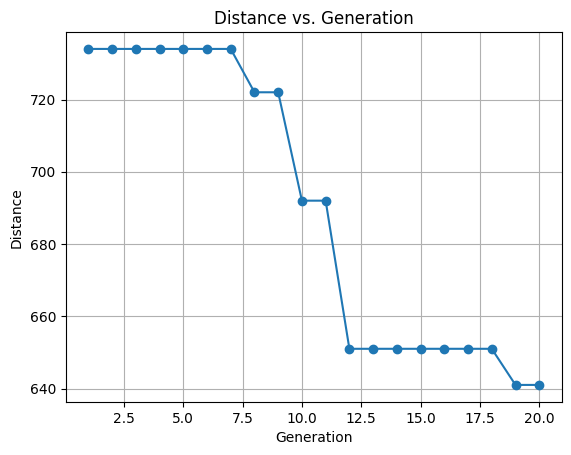


✅ Final Best Path: [12, 11, 0, 1, 4, 6, 8, 13, 5, 3, 9, 7, 14, 10, 2]
✅ Total Distance: 641.0


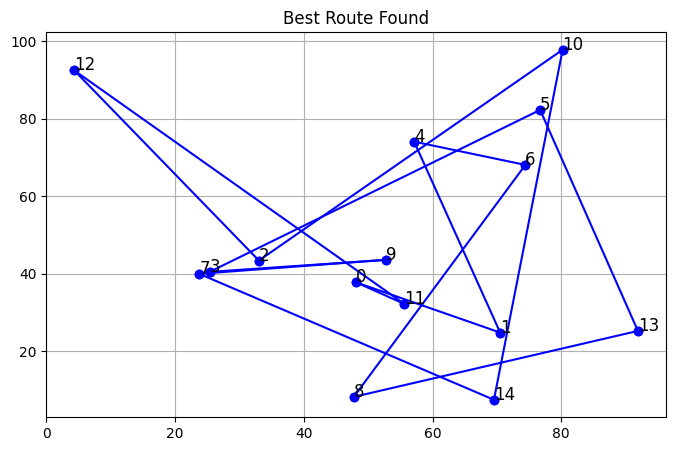

In [5]:
best_path, best_distance = genetic_algorithm_verbose()
print("\n✅ Final Best Path:", best_path)
print("✅ Total Distance:", best_distance)
plot_route(best_path, "Best Route Found")
